In [1]:
%use deeplearning4j

# Simple network from scrach and with Deeplearning4J
Inspired by 
- https://www.youtube.com/watch?v=kft1AJ9WVDk
- https://www.youtube.com/watch?v=SGZ6BttHMPw&list=PL6Xpj9I5qXYEcOhn7TqghAJ6NAPrNmUBH
- [deeplearning4j-examples:MultiClassLogit.java](https://github.com/eclipse/deeplearning4j-examples/blob/master/dl4j-examples/src/main/java/org/deeplearning4j/examples/dataexamples/MultiClassLogit.java)

### Prediction of an binary computation

#### Probleme set

Given some training data:

|           |  inputs ||| outputs |
|-----------|---|---|---|---|
| example 1 | 0 | 0 | 1 | 0 |
| example 2 | 1 | 1 | 1 | 1 |
| example 3 | 1 | 0 | 1 | 1 |
| example 4 | 0 | 1 | 1 | 0 |

What should the new output be for

|           |  inputs ||| outputs |
|-----------|---|---|---|---|
| new situation | 1 | 1 | 1 | ? |

Using a simple neural network
<img alt="simple neural network" src="data:image/png;base64,
iVBORw0KGgoAAAANSUhEUgAAAOUAAACNCAYAAABIbr0hAAAbb0lEQVR4Xu2dCbxV
09vHn5skU8gQlQZDiQYZCvEvSiWlASEqioiQchOikLcUeqk0UF4hKQoNlNJAShMy
ZGykhDKToe77+S7vPu+pzr1n733WPnufc57n8+lzL3fvtdf+7f3ba61nPc/vySso
KCiQFGzWrFny5ptvynvvvSeff/65bNq0SX755RfT4v777y9HHHGEHHvssXLiiSfK
WWedJY0bN07hanqqIpD9COT5IeXbb78tTz75pEycOFFq1aolDRo0kJNPPlmqVq0q
ZcuWNWTEIOfGjRvl008/leXLl8u8efPk/fffl7Zt28pVV10lZ5xxRvYjrHeoCHhE
wBMpIeOAAQPkk08+kWuuuUYuv/xyKVeunKdLfv311/Lss8/K448/Lscdd5zcfvvt
Sk5PCOrB2Y6Aa1LecsstMmHCBLn77rula9euVnAZMWKE3HvvvXLppZfKkCFDrLSp
jSgCmY5AUlKuXLlSOnXqZNaEDz/8sJQqVcrqPf/000/Ss2dPsyYdO3as1KxZ02r7
2pgikGkIFElKnDgXX3yxDBw40NroWBhAjJq9e/eWSZMmqTMo094i7a9VBAolJYRs
2rSpTJkyRVq2bGn1ooU19vLLL0vr1q3ltddeU2KmBXG9SBQRSEhKpqxsX4wbNy5t
hHTAgZgdOnQw2yw6lY3iK6N9ChqBhKQ85ZRTpHPnzoFPWYuayo4ZM0aWLVsW9P1r
+4pA5BDYjZR4WdlffOKJJ0Lt7NVXX232O9UrG+pj0IuHgMBOpGQf8sILLzT7kAcc
cEAI3fn/S/78888mGOHFF1/UfcxQn4RePN0I7ETKFi1aSLNmzUKbtu5683hkZ8yY
IVOnTk03Lno9RSA0BGKkZJTs2LGjiV+NkhE3+9RTT+loGaWHon0JFIEYKQmbgwC9
evUK9IJeGx80aJD5UBCWp6YI5AICMVKyhvz44489x7IGDRKxsscff7wQ+aOmCOQC
AoaUBAr0799fFixYEMl7/s9//iN9+vTRgIJIPh3tlG0EDCnvuusuycvLM8HhUTSC
4En7vO+++6LYPe2TImAVAUNKvK7sC3oNp3v++edN6hXB5ASqv/rqqyZP8oMPPpBD
Dz3UWkeJ8mHfVL2w1iDVhiKMgCEleY0vvfSSyW/0auRU7rnnnvLQQw9JjRo1ZPTo
0dK8eXOvzRR5PPumrVq1MvunaopAtiNgSImTZ8OGDb7Ssn788UcTo0obKAmMGjXK
YIYsCHmShMoxeg4bNsw3lgQSHHnkkers8Y2gnphJCBhSFitWTLZv327WlX6MfEhy
LZH9qFKlimkCIjGNfffdd80IlwopWU/usccesmPHDj/d03MUgYxCIGVSsp48++yz
5bzzzpOtW7eatKt4Yy3IMUrKjHovtLMhIpDS9HXbtm1CRskNN9xg1An4HamQ66+/
PnZLNkip09cQ3xC9dNoRSMnRQ0bJqlWrYqMjSnWMmu+8846JDsJskFIdPWl/L/SC
ISKQ0paIm37bIKVuibhBWo/JFgQCDx6wQUoNHsiW103vww0CgYXZ4c2tWLGi/P77
7/LXX3/JgQceKITzEcfq1TTMzitienwmI6AB6Zn89LTvWYmApm4leKyUZJg8eXIs
rO+YY46Rk046yZRpwAhkIOQPLVw1RcA2ApFPcq5UqZIhRLdu3eScc86xff8J21u9
erW5JvuumzdvltNOO03++ecfIY2Mv1E3ZcuWLULQhZoiYBuByMuBMGI1atTIiDRD
EsShL7roIjn11FNtY7FTe4yGeH0/++wzeeONN0wABJKbixYtMlq4r7zyitVQwkBv
RhvPKAQSCmcRLme7PIFXVEhqJkA+XjiLfVDIyb+SJUsacvKvWrVqXptPevwVV1xh
RssvvvhC6tWrZ6qFHX300YaUBN4TWmgzlDBph/SAnEEgYyUm33rrLUPOF154QSpX
rhwjaPny5a08PORHWDeuWbPGpKRBSqqFQUquS/SSYza2fax0WhvJCgSyQowZ0kBO
yEKmCqMn09xUZDKZtrJ2LFOmjBktGRVZ37K2/OGHH0yAvJIyKzgQuZvIqrIFZJM4
5OQnGrbOFDeeRG6fAlWoqaeCNxZjdCR5m49AvOlI6RZRPc4NAllb4AeVd2d6S10S
Z/RE19a2KSltI5rb7eVEKTxKvDsE/fLLL2OjJ5FCNkxJaQNFbcNBoEhSclB80Vgk
P1JZpyWCnbVajx490lY0Fs+yM8UlBNDZYqldu7bnt8JmKKHni+sJWYtAUlI6d56N
5dWXL18eG0H52DjrTyftLGufut5YpBFwTUrugtIGAwYMMPIeKKojmlWuXDlPN0hU
DFsLbDmwD4kaHh7TsG3evHmxEZR+OSPo4YcfHnbX9Po5hoAnUjrYQE48ksSC1qpV
Sxo0aGC2D6iSVbZsWVPCDsPZwnqOKSOjEi8++31t27Y1YlpRIGOi5z1t2rTYCErS
tuMk2nfffXPs9dDbDQMBX6SM7yjpWHg3CUOj5gcqdpARg5xsKzAdJHib6tCNGzcO
4z59XZM9SSeCiLA6Z/RkqyXXjPU3H1VUJRBEw2HGs0bN8O+//zYyo6Tn8byJfCLq
qW7duuaDvc8+++QaXCndb8qkTOnqGXQyAQOOB3fJkiUxgjZp0iSD7sJ7V4n35b6Z
PZAQcPrpp5vZER9ali6sxUuUKGFyZgmNZHnCx5kZEdFPxA2jA8wHrUOHDt47kINn
KCl9PPT169fH1p9fffVVjKBRnY57vUXIRQXtxx57zGTIoN+Ler6f6ftvv/1mAvsn
TJggixcvNqJqOA1te/G93mOUj1dSpvh0qFTmjKBskTjrT6ZvmWjo91KzhXX/TTfd
JCeccIK12/joo49k6NChQrkL6tewFaa2OwJKSotvBestZw/0sMMOi42gBMxH3RDN
vvnmm826kEJPQSZw439Ad4n16COPPCJ+9oijjmcq/VNSpoJeEefOnj3bEJR/rMGc
EfSQQw4J6Ir+mx0zZowp8DR8+PCdNHv9t+juTKbHaAYTEdW5c2d3J+XAUUrKNDxk
iic5IygB7o4Xl5zQsK1v375m+k0J+6ATxxPd69KlS6Vjx44Gk3vuuSdsOCJxfSVl
Gh8DivLO+pPyDryI/PNagtBWl/Pz880WB4nkNksXeu3fd999ZzJ62EIZPHiw19Oz
7nglZUiPlBfRGT2JL3ZGz4YNG6alR4yQc+fONWlofryqtjuJl5Z6NARr5PqImRIp
szlwwPZLV1R7iHE560/I6qw/69SpE0g3WEOSXDB//vxQR8hdb457r1+/vpFayeU1
pmdSZnuIXSAs8NAoo6YzghYvXjw2groRseY8CF2U4WVFe4gAiDDWkMmgYI3Jx2jF
ihU565V1TcpsDkZP9qKE9feFCxfGRlDU9ZwRlN93NRIEGAGZvaD+V5iRQ0owQHxl
tLDur7Dr4pUl2GDBggVR61pa+uOKlNmYtpUWdC1eZObMmbERlJHEcRKxr4ghe3nl
lVcKzqTXX39dEiVwExhA/CpxvFG3Cy64wMTN5mKAQZGkjE9w5oHalp0knIv1A5vJ
Y8eONWXa1ZIj4Kw/+YnnFoKi4o6T5Ndff5W9997bxJwSIucYWCP8hXMnyMCA5L13
d4RTjHjt2rU5F5JXpEYPD3vgwIGmEGyQNmLECOndu7fZLsikLJIgMXHTNgR0CAoJ
ydYgswUjQwcCklKH9evXT7755hsZOXKkm6Yjccy1115rsk7oey5ZQlKyLmGTmylR
uvbQCFpu3bq1KUCrxPT2CpIqx3SV2FKI6dhBBx1kPKzE4RL2B0ltxrJ666X3o7kf
Rv9vv/3W+8kZfMZupGTKSt4jKTvpIqSDH8QkvYf8zDCnsplU4IdSDjh2eIFJn3Js
v/32EwLkIeGNN95oRtRMWEvuyiXWlji4cintazdSom3KHlHQU9bCPmRMZfEiLlu2
LLRvXSYV+Gnfvr2RV8Hhg1eWBOPq1aub9SOB8Pwk2+Oyyy6Tdu3ahYap3wuPHz9e
nnvuuVgFNL/tZNJ5O5ESLytTIQKEwzSCo1kTkdMXlrkp8DNnzhy59dZb5fvvvxem
io8++qjxGKbTUHKHeCQaJzIUA4jYYf0ZZOTO1q1bZPCgB2TJksVGPf6GbjdJy5at
U4aCSB9GfX7mioLBTqXwiD9EFCvsBFRkJ9H7iS/uk/LT9diAmwI/JO2S9YHnk9om
TLNwpkTJZsyYYaJ3+IAEZSjTd7mmk6xZs1puuvkW2X//UrJjx3Zp2PBcK5ck9BAv
fRBC2lY6aLmRGClbtGhhbjqsaeuu98U0lheKIjthmJcCP/QPrycfM9Z4e+21Vxhd
TnhNYlxZW/bv3z+wPi1dukS63XCd5Of3losubmv9On369DGjb67ExBpSEq1D+gza
KlEydGBIKQpDZsNLgR8wwzHG+gfvcZSsTZs2Zj3J9lZQ9uij/y3PPjNOpk1/TQ49
9DDrl2GrjHUltUqjbsxKunTpElN09NNfQ0pCtCBAr169/LQR2DmDBg0yHwpGrTDM
bYEf4kkvueQSIbG5QoUKYXS10GuSYM2HLciAga5du8ia1avltZmzA7l3AgkYNBDj
iroRuMHMhOn2HXfc4YuchpRMu9Ca8SqsHDRAKKMRiE00SlQNqUWm/ejOBPni+71/
9ifZLgkyX7JJ43Pk6KOPkcdGjPbbzSLPI3uErZ1M2K9E3oRAmB07dkheXp4RCfNK
zryZM2cWsN6IavAvm+KsKaIYUIBTB9lFAqjT7XV1+/bjlcXzWph31m07ux7HGhpn
ztatP0jLC5pJmzYXyS09eprDSpSwu6Zm/xUPbPw+rN9+p+M8nH9btmz5PyxKeCZn
Xp8+fQpgNGJJUTQElvDuobAWNaNvTLHjdXfYX01nqYNhw4ZJt27dCoWGZwt+tu3e
e/rK9OmJnXBvvrXIOjG5j0w2xKoJhCCII5nlNW/evIB9Qa/RO0zXqAPCfJ9AdTLY
KUWAerbNqRJRPuybhuWFTQZgmH//888/zZoFrR8kG5kqkYMZb0GNlOjd/vjjDzJl
8osybdorcv9/DZTDDz/CXPqEE6qb0cGW5dxIWbVq1QKEnShq49Uo8MMXAI8T8ZWj
R482atg2jX3TVq1amf1Ttd0RIGGAWU6xYsXMtgEfSsjpbMsEvabs2eNmWbZsqcyd
95bpQxCWaWtKngHOHt9rylKlShVs2LDBV1oWup3EqOIoYtti1KhR5pnYjHQhkIDo
mig7e4J4Ed22ydru4IMPFnDCWHthOBsgJ2UGgvS+nt+ssZQtW04ef+LfEvRBWM55
X/Py8gocVvsBFNcvuZZU1qpSpYppwmakC+shRgCmZ3i0+G9+xv+e6P8F/Xdb/bDR
DqF0PMN4Y6Qk64YpblD7lN999600P7+pXHLJZdKjZ76f18fVOTm3T5kKKZ1EVFTI
iGRJtHGeaqSLQ0py6pgeMSXgZ2G/J/q7n3Pi2/dzvp9z/F7zqKOOEqZ4GGtIPkjd
u3eXO++808QPBxXRs2D+PMnP7yF9+94rzc63u2yJZ2vORfT4nb4iO0FGCQrXnTp1
Mr8Torer9kuqkS46fS16MGHJAAEhIh9ASg9ARqa0WJCxr6NGPiZjxz4hzz//olQK
sDRDzsW++nX0sF5ZtWpVbHQk2oKEVMR9nfLkNiJd1NFTNCnxvpJBQc4kZMSxE29B
Zolc37WLfPHF5zJz1htWva3x/c/JLBG/WyLJFgO2Il10S6RopPG+kgBMBe3CjGQD
2/mUTJdbtTxfmjZtJnfdHZxcR07mUwYRPGAz0iXKwQPJPkxR+TtLCBvKA7Nnz5Jf
f/lVSpcuLePG/Y98/PFH8tS4Z+XYY/918AVhOak8EESYnc1IlyiH2QXxEgbVpg2N
ntdfnyVDHh5spsuVKlWWrtd3k9NOOz2oLpuY3ZzV6NGA9MDeq8g0jPd606ZNsb3k
yHSsiI5cd911JmQxJ9XsNHUrE17R1Pqouq+p4ZfOszXJOZ1oh3wtVUgP+QG4vLzK
gbgEKhMOI4iD/FMioAhM55/zO/u9JGKzp6m1RKL9NHcTziJcznZ5Aq8QMNUiQD5M
4SyvfQ77eESYqaLF3nGivEMifVijUW9Eq26F/bSKvr5KTEb7+XjuHVNUMt2JeXWM
OFiSxB0xZq1P6RnWtJ6gYsxphTv4i0E8FOwQ/iKaByPLhsioeN1UreQc/LPwewUt
W+AXuYidRyYF+jCMkBTGISaZaSxB7mjSksK1q+Xn55uwSJYJNhPTvUJDdBCaw3Xr
1pXBgwd7PT3rjtcCPxn+SJ9++mlDRlTUCEZHEJo8V5T4cPQ8+OCDhqSFGSMmhCbn
MozKzlRuRqkOCcxc0XVN9sppKbxkCEX078huQkbIBxnjFR8oo0AsLDGxbkpQsMZE
Emb48OFprfCM4BgjOn2kfo3avwi4LhqL5Iftcga46anUq0Vj3b+OQ4cONWSsVq2a
IWOiUurEHiPNQrijWyOjh/YoFIS8SJBymTxv+saIzr3Url3bbTdz4jgtr57gMUet
FB5rQ15eCgix7oI8lCsMwvDeohzInibpYDbrWRLLyj1MnDjRKEnkYul0N8/MFSlp
iNIGAwYMMF48wvIQzfIq3oy4MmXbmHqxD4nAUBglCZIBE5VSeMwkeIkhZJMmTQwZ
07HuY58YxQKml5RoJ9gAtUM/VbsIXif9bsKECUYmhiR4cnFtz7qSPdNM+rtrUjo3
BTkZSfjaIYmPCDElvKmSxTqGpFuMknobN2402j3Lly+XefPmGdn5tm3bGinKKJIx
/sG5KYXH/ZCnyNYDm/NMyajWlarhjYSI/GPEgoyoBYZhpH3hCJo2bZoRnsaLy3Mn
kZ2PMuTi3hnNITMfXkpNgM2iRYuEsu+sd3Hk5FLh11SelWdSxl+MMuxUXWaNwIMg
CwEyYpATJwQPj/UJ060oqpwXBp6bUngoj2MoyKGDysu6du1aX/UjaAdVQYeMeEwh
o6PikMpDtnEuHx4+rGyhoO1LEjvPm3Uh0URIjbIe5ZlTuJaPCFNtPtq5UlfSBs60
kRIpbXUiiu14LYUHGdEp4mX1OjXjgwYZ0duBiPxjpFbLTQSUlIU8d7el8FasWGGm
5IxykIrYUrfGiAMZUZunBDpk3FVjx21belz2IKCkLOJZui2FRxM4wHCIUCgpWUA/
G+Y4cCj14IyMyc7JnldO7yQZAkrKZAh5+DupU4hTJ9o7pBnC3RgZcYA4ZLRdDctD
d/XQiCKgpEzhwTA64oHEqcXv9evXlyVLlkjFihV3apVispCRtCrIyP6fmiJQGAJK
yhTeDRTiqH7NdgDTT7ZEmMI6xjYCZMRLCRnZ31VTBJIhoKRMhpCPv0NWyPjHH38Y
B47uz/kAMYdPUVJafPjPPPOMceCwZ8fIiFdWTRHwikBKpFy/fr2wXiJ86sMPP5R1
69YJGQpM53BgUOGY9VX16tVNuBYOkAoVKnjtY+SPJ8uCkZGcRMiIgLCaIuAXAV+k
HDt2rJDHxz4bMZn16tUzdSorV65siIj8BMm2EHTNmjWycuVKWbhwocycOdNEerRv
394UBcp0I9UJMhJ1AxkzKWIp07HP5v57IuXIkSPlgQceMMSCVFRY9mpUjYbUEPq2
224zYk6ZZFS2ckLhCA6HjKi4qykCthBwRUpy7ZyS3aTcnHnmmSlfnz07UoSY6pIu
FPWcOuJcHTKee+65xoFDbKeaImAbgaSkZFQjKzyorHQn+5x1WRSntEzBnVxGdGQY
GQk8V1MEgkKgSFLef//9QuoO68c6deoE1Qez4c46k60DaixGwUhBckZGPkqQkfQ0
NUUgaAQKJSWEnDJliklQ9ZrM7KfTkIBE2tatW4dKTLI8ICMzAycUbtcIHT/3p+co
Am4RSEhKpqw4dEhQTQchnc5CTBJpcQCleyqLVAVkRBnBIWOZMmXc4qjHKQLWENiN
lDh1kLUnmTXIKWthd8BUFgcKKVHpcP6gigAZp0+fbsiIA4dkXTVFICwEdiMlRTqR
bkBLJSzD+YPcCJnuQRn7ppARL7AzMpYsWTKoy2m7ioBrBHYiJfuQrCPZ5A/bCEpg
fWl7H5MpOWRkn9QhY9j3qtdXBOIR2ImUROTgabWxD5kqzIxgeGSJCLJhM2bMMGRE
IQAyFqUabuN62oYi4BeBGClx7hBt41Rm8tugzfOIISVqKBWnz+TJkw0ZEfSCjEjk
qykCUUYgRkrWkry0fkLngrpBPhIQau7cuZ4vMX78eHMuRVO5L6Qa1RSBTEDAkJJs
DzyuRK9EzQhwxxPrNruEER8yli5dOnIfmahhq/2JJgKGlLzIc+bMMXt0UTOU2Bs2
bJh0CjtixAhDRtbFjIxNmzaN2q1ofxQBVwgYUnbp0sUIJnvZBiGQnH1MQtDQnNm+
fbvJlsBr6qWwTLJesj2C2DMFa3a1HTt2xELh2NOEjIj/qikCmYyAISUlBAYNGuTZ
60piM8rnlDLAoTJ16lSTN8k6zpbhhUUHh2s4hlq3E5fqrIVJolZTBLIBAUNKQumI
pPETUkeJPNTEN2/ebNpwZPYJLsdBQyVhUp2YXiKT4dUIvWNE5ufWrVtjZGQPk5Ex
yJJtXvuqxysCNhAwpEQpgApP/PRqOIfKly9vymPHr0lR/W7Tpo1pjkDzFi1aSNeu
Xb02bxQMUIrr3r27ISQK5JCR+oxqikA2ImBImZeXJwUFBb7uD3Eo1naExLGFkSjw
gGRmyNW/f39f16B/TvQNjhw1RSCbEUhppCT6p1+/fqbsGUEHqBLwO1WoHNu2bZsp
fMMUlzJqXs0ZKfmppgjkAgK+15TsbeLxhIwIZ2Fs0DPVhIAYoy+hcuQjkp/px+LX
lH7O13MUgUxDICXva7Kbzc/PFwqgUmSWKagfS+R99dOOnqMIZAoCvvcpk90gWyzz
5883ygXFixdPdnihfy9qn9J3o3qiIhBhBAKJ6CGQACIiTuxUlWrXrp3ZC/VqbiN6
vLarxysCUUUg62Jfowq09ksRcItA1maJuAVAj1MEooZA1udTRg1w7Y8ikAyBnFEe
SAaE/l0RiAoCOafRExXgtR+KQGEI7KZmR+oToXNe0rhsw8s2yKRJk3wpDtjui7an
CKQbgZzXfU034Ho9RSAZAqqQngwh/bsikGYEtJZImgHXyykCyRDQqlvJENK/KwJp
RkDrU6YZcL2cIpAMgaSkpAGK/vTo0cPEsdqu5Eye5JAhQ9JSzCcZGPp3RSAKCLgi
pdNRao1QIq9GjRpG8tGPcDPqBEhaUsuDkne2a4VEAVTtgyKQCgKeSOlcCFKhOgCx
kJQkyblmzZpGcxXxZLR+GAHR76EWyMqVK43KHYWDIDSJz6mUIkjlhvVcRSDqCPgi
pXNTqA/Mnj1bFi9eLMhNrlu3zhARTVimuhAU1YHq1asLEpCNGjVyrXQedeC0f4pA
UAj8L6Hb51lE48yvAAAAAElFTkSuQmCC
">

### Generate inputs / outputs

In [2]:
val training_inputs = Nd4j.create(arrayOf(
    floatArrayOf(0f, 0f, 1f), 
    floatArrayOf(1f, 1f, 1f), 
    floatArrayOf(1f, 0f, 1f), 
    floatArrayOf(0f, 1f, 1f)))

val training_outputs = Nd4j.create(arrayOf(
    floatArrayOf(0f), 
    floatArrayOf(1f), 
    floatArrayOf(1f), 
    floatArrayOf(0f)))

<hr>

## Starting from scrach
### Artificial neuron in action

<img align="right" width="400" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAR4AAADzCAYAAABQZHk+AAAgAElEQVR4Xu2dCZQV
1dWFr1ECKpExQYQggoZARBMQARFkDCAoChhFEBTBBJmEoIIhRgERgooiyCRqwihB
kACCAxImmU0CRkRmEQdmpxiDwr+++6faR9vd79WrW1W3qs5Zq1ej/WraVW/XuWfY
57STJ0+eVGKCgCAgCASIwGlCPAGiLYcSBAQBjYAQjzwIgoAgEDgCQjyBQy4HFAQE
ASEeeQYEAUEgcASEeAKHXA4oCAgCQjzyDAgCgkDgCAjxBA65HFAQEASEeOQZEAQE
gcAREOIJHHI5oCAgCAjxyDMgCAgCgSMgxBM45HJAQUAQEOKRZ0AQEAQCRyDWxPPv
f/9b/e1vf1Pr1q1TW7ZsUTt37lQffvihOnbsmDp+/LgqVKiQKl68uCpbtqyqXLmy
ql69uqpdu7Zq2LChOuusswK/GXJAQSApCMSSeP785z+rv/zlL2rhwoWqcePGqm7d
uurSSy9VF110kSpXrpwqVqyY+v73v6/++9//qk8++UTt379fbd++Xf3zn/9Ua9as
Ua+//rpq3bq1uuGGG1Tnzp2T8izIdQoCgSEQG+KBQEaPHq2eeuopVadOHXXTTTep
Nm3aqLPPPts1mF988YWaP3++mjVrllq7dq268847Vb9+/TRhiQkCgoB3BGJBPI89
9pgaOnSo+tWvfqX69Omjfvazn3lH5n97+Ne//qWefPJJ9fzzz6vf//73qn///sb2
LTsSBJKKQKSJ5+9//7vq27evjtMMGTJE/fznP/ftPv7jH/9Q999/v44PPfHEE+oX
v/iFb8eSHQsCcUcgssQzZcoU1a1bNzVu3Di9FArKWMr17NlTPf300+r2228P6rBy
HEEgVghEknj+8Ic/6ODxn/70J1WrVq3Ab8iGDRtUly5ddPD5wQcfDPz4ckBBIOoI
RI547r77bp0ef+GFF9QPf/jD0PA/ePCgateunU6/jxo1KrTzkAMLAlFEIFLEg6ez
bNkytXjx4qyyVaZvENmvli1bqkaNGonnYxpc2V+sEYgM8RDTefTRR9Xy5ctD9XRy
Pw14PldddZX67W9/KzGfWH9V5OJMIhAJ4iF7VaNGDbV+/fpQYjrpACfmc/nll6s3
33xTsl3pwJK/CwJRmTLRoEEDXRAYZPbK7dNBtouCwxUrVrjdVD4vCCQOAes9HooD
6bf661//av3Nufbaa3WflxQZWn+r5ARDRsBq4qENomLFijqg7GdxoKl7QJEhgeY9
e/ZIe4UpUGU/sUTAauJ54IEH1EcffaQmTJgQGfB//etf6253zl1MEBAE8kbAauL5
0Y9+pL0dk71Xfj8I9Hbh9Rw4cMDvQ8n+BYHIImAt8SBtMWfOnEjEdnLffWI97du3
F0mNyH4t5MT9RsBa4rnmmmtUhw4d1M033+w3Bsb3P2PGDDVz5ky1YMEC4/uWHQoC
cUDASuJBORAdnc8//9yKCmW3N5qK5qJFiyp+i5KhW/Tk80lAwErieemll3SV8tKl
SyN7D5o0aaKrma+++urIXoOcuCDgFwJWEg89Wd98840aNmyYX9ft+34HDx6sTj/9
dOnh8h1pOUAUEbCSeNq2bavjO8hOeDE0lWllQDend+/emsyogm7evLkW9fLTkO0g
zjN37lw/DyP7donArl271NatW9W+ffvUkSNHckT/S5YsqX784x+rqlWrqkqVKrnc
q3zcLQJWEg/C7GjtmCgafOutt1T9+vXVG2+8oUmAgO/q1au1N+KnUUyIZg8C8mLh
IcDLBtlahP8pzUDkn/KMChUqKMimcOHC6quvvtIk9N577ynKIXhhURKB4P+NN97o
+7MSHjrhHdlK4qF+hwfAlN4O8aLJkyerjz/+WDeaMm0Cox0DBUPegnSZly5d2tid
YH884FLPYwxSVzvCoxkzZoy+77x4EP5v1qyZOv/889PuZ+/everVV1/Vgv8rV65U
3bt311reeERiZhCwknh4K5HR4rcJO3TokCpfvrwW7po+fXrOLukmL1WqlKpXr57C
QzFJPLw1yWzxWyxYBFhGI/5PcJ/GYi9LJ15KNADz8kLsH21vMe8IWEk8p512mjp5
8qT3q/vfHpg+ceLECd1s+uKLL6orr7zylH1DSqaJhwNwHa+88op+04r5jwBaTcTy
EOKHIDLxbjI9K7wgCA2JFqaOoMEklj0CVhKPSY9n6tSpum+KWAsd7ry1+DfeiGN+
EA+eDrVIxBBw2xkqKOYfAiyZBw4cqCZOnOhr0SnFofTjjRgxQov+i2WHgJXEYyrG
Q7CQtx+Ew3IKI1h4zjnn6LW/n8TjxHiIIw0YMECTDyOSxcwjgOA+GtyQwsUXX2z+
ALn2SMKCinqW7pR+iLlHwEriMZnVygQSPzye1KwW3fWPPPKIJp8LLrggk1OSz2SI
ALVeZCr54YUVlJE0oK2HH2q2xNwhYCXxmKrjyRQKP4gndx0PwUkaXyGfIL8gmWIQ
xc8988wz6o9//KNOkyNFErR9+OGHOu1+zz33qK5duwZ9+Egfz0riCapymbE0TAVF
8wcyoL2BQX0mLK/KZZYEBJshH+nh8oayLTrcored3X20knji3KvFXLDNmzerl19+
Obs7JltpBJCYJVtpgw436fbZs2frrKlYZghYSTxx707ny0IxIwFRMfcIkMFatGiR
4gVli+Ett2rVSjJdGd4QK4mHc4+7Hk/nzp31LSLuI+YOAWJyiMTVqVPH3YY+fnrt
2rVa/O3999/38Sjx2bW1xJMEBUKC6Oeee66ujBXLDAG8HQoFWdrYZiz9KCyU+p70
d8Za4uHUk6C5TKc85QNkZ8TSI3DZZZephx9+2MpqcJIGgwYNUhs3bkx/IQn/hNXE
Q8UxKUuqUaNiv/nNb7QXk+mUCVQKf/nLX+ofKUYr+C6TycKr2L59u7WPAw3IeGMU
rorlj4DVxJOUuVoEmiEe4j40NorljcDw4cO1isDo0aOthahfv35aVeG+++6z9hxt
ODGriQeAkjJJdOfOnVqgjHQ7vUBi30WgZcuWqkePHoopHrYa7Tnjx49XixcvtvUU
rTgv64kHlJIyO536Hjwfqpw7duxoxQNi00kQ86PB10SVMpXGzLmH8FGKvOmmm4xc
KqEBYnaiw1QwnJEgHluqVPOD0mT1KkqJkM+0adPUddddZ+TLEIedoKlUpUoVdfjw
YSOXM3bsWN1QindJRbkp4uHk0Hjatm2bUX0nIxdt0U4iQTzgNWXKFO0JkEo1pUxo
4j4QcyCFSmwGbWcTRlsFyy6yJE2bNjWxy8jvA2+wU6dOuurbpEE+tLeYJJ5LLrlE
vzj4LZY3ApEhHk6frA8Ngayf0boJ28hIEXegUZC3pkmbN2+eDjZDPjYVypm8Rjf7
WrVqlU5VI0Vq0vwgHqRWSfnnFpwzed5R31ekiAewCb6uW7dOtxuE6fng6aDHUrt2
bUWzqR+GiBmdz5BPEDozflyDqX3i6fLiMd0P5Qfx0EfGi0hUCvO/+5EjHsfzQXaC
SRS1atUy9WxnvB9iOkyQYPyOaU8n90mQISGzx/IryVo+vGwQXOe3SfODeHgZITTP
b7EYLLVSL4GYT7du3fSUiCA7lGlvoCQe+QxTMZ10DyciYsQM8HzC9PLSnaeff0d0
nXgXv02aH8SDuPxrr73mSWTe5DXauK9IejwOkGS7+vbtq4oXL67FvU3M4crvJqEo
iNj3sWPHtIZP0JWpVELzMEM+Z555po3Pkq/nxHysM844Q3399ddG5lyhic0AgJo1
a2qtZrxXtL6/973veboO0+fp6WQs3jjSxOPgylKEcSboKTNlgHlWpoz5XrjNlMEj
FN+/f39Tu3a9H7Sb0ftdsmSJ623jsAFZoueee07VqFHD8+UQ+GWwY6qRtGjRooWn
fTMy6dZbbzWeffN0UhZuHAviAVfaKyilZylEFoj0KEPcssl+ka1imNusWbMUcgcs
5SiFL1asWOi3kMpditOSqOVzxx13aMF8Xi62GqNvtmzZoiZNmmTrKVpxXrEhnlQ0
kdQg+MzY2saNG+vRMlST0sBXrlw5TSC41bjbENb+/ft14yFVsWvWrFGvv/66Hl+L
++3o5lhxt/53ErfccoteEhBcT5IxiphYF8Lutho6UtQb4X2L5Y9ALInHuVyUDEm/
kgnhLUR5PCXtxGmOHz+uChUqpONDlOBXrlxZv03JRJAOtV0T+frrr1fnnXeeDq4n
xb788kt9vxhPbKNgPp4oY455vpIYh3PzHMaaeNwAEbXPMmmV6maC3CNHjoza6Wd9
vmQSaZ2gvsk2Q1OJVgkyrmIFIyDEE+EnhPny9HURECXjlgTDe0WTh5HCthkjk0lC
SP1O+jsjxJMeI6s/wWgeyIdMSpgZtyBBIn5CGtwmrwdvZ9OmTYo4lFh6BIR40mNk
/Sd27Nihl1333nuvIvMTd6PEgZT61q1brSjSo6ixatWqilS6yVKOON9HIZ6Y3F0y
cng+lBQw1zvuRhMmEiI2ZLjIZJE5FdXBzJ86IZ7MsbL+kxTEQT4zZszQNUxxN64R
DwNJ1LAMssEDo+5LLHMEhHgyxyoSn2RCKcPlaCpt0qRJJM4525M8evSo7gBHTfCu
u+7KdjdZb/f4448r5rfTOV+iRIms95PEDYV4YnjX586dq4PN9HXFPcNC4SdEy3SP
IIXyEaWbMGGCnmZKYaqYOwSEeNzhFeinn332WQWJOHGMCy+8UAdVnWF2FKvxt7ya
Y6nepvkR8ol7wJPgLil2BLiCmEBB+wyCZNwHOtHF3CMQa+KJeuUyXyiI5siRI3rW
Oj1odGfT4sHfSCmjQZxfRzV9aywHWHZVrFjR/dMRoS3+85//6CUXVc00Dfuh04QO
EyULED5LrCJFikQIIbtONZbEE6deLR5yApfvvvuu7iFDnoPro6cMeVTGqdAGQlMs
Eyxvu+02hZC5Y6gjEmzG8yldurRdT58PZ8PyB08PHKjzMTGRAnyp08EDHTFihF7W
iXlDIDbEE9fudBoO8Xqo1alXr55uZKWvDOKht4y4xqeffqp70dAneuedd04hHh4P
JEMhLcgnCW9pJlKQ6WLZxRQJmmrBzq2RJUR+lkm2LK/IYCWBvN3ilM3nY0E8jh4P
63zkMU3GNEiVInVARWoYejyTJ0/WcZzdu3drkXuIZ/r06Zp46MBnlrhjqCLiEaV6
PM7fIKi33347UYPmWJ7SN4W8Ce0lZPkItqM6SHsDY2gclQKWrLRhoHdEW8bSpUtV
0aJFtSdJf1iZMmWy+X7JNvkgEGniSYICIUssYjk8+Hg9eDfEa4j1kE4+/fTTMyIe
PsQSgS8YhJU04wWCUgFxGiqe33vvPR07QxoF8ilZsqSqUKGCrkAmPoRCgckXWNLw
Tne9kSWeJGkuE6egEZQYA4aXg/Zy7jG5BXk8zoPA0g0JUZT8xJQ67bTTFJ3+YsEi
EEniIWaRlCkTbh6HTIiH/TGhtHz58nkuydwcLw6fFeIJ5y5GjniSNFfL7SORKfHw
hqe1giUcWZokmxBPOHc/UsSTpEmibh4HJhsQLKVuiZgFKn3U7lSrVi3f3Xz22Wea
fKj6JWieVBPiCefOR4Z4kjQ7PahHgfoUyIfCO9LFSTQhnnDueiSIh+wVtSzr16/3
pSLVK/RkSi6//HKtxxL0vC2v506mrFmzZrpGpXv37l53F7nthXjCuWWRIJ4GDRro
eoogJ4a6vR20J1AvsmLFCrebhv55an/wfBhU2KFDh9DPJ8gTEOIJEu1vj2U98VAc
SP0FrQG227XXXqvrP6IoQbpq1SpNPpAn15EUK4h4eNkx+K9Xr15JgSOw67SaeGiD
oFhu2bJlvo4nNoU2nkOjRo3Unj17rBj+5/a60PJp1aqVDkwzjywJJsQTzl22mniY
F46YOY1/UTF6gyj449yjaEwoJdhMXxdxq7ibEE84d9hq4mFoG95OlErXKc3H62G4
W1SNCaUEm/F8ooR9NninIx7aKGgWpYcLIqbim2m0Yt4QsJZ4kH6YM2dOJGI7uW8B
MZL27dtbOf4408eFYDnBZsiHGqG4WjrioavfqYlCXpXeuddeey2ucAR2XdYSD8r9
ZFiiODEB/ZuZM2daMQHBy5OEBg1d+Xzx6OSOo6UjnnPPPVeLqWHEHNFWpuudXjmx
7BGwkniowD377LO1lAG/o2ZffPGFllTgt+0z2NNhy4RSsorEfAoXLpzu45H7ezri
oVM9VcsZ4gGPSy+9NHLXatMJW0k8CGgjpo0mSlQN7RceWFoSom6UByAwxn2Jm6Uj
nrw8HhIexB/FskfASuKhJ4v+o2HDhmV/ZSFvOXjwYK2V8+CDD4Z8JmYOT7YO/R9H
aN7MXsPfSzriIbmBt4dOD20liKkR9xHzhoCVxNO2bVsd37nhhhs8XR0Nk2QiUJDr
3bu3JjOqoBn3yxLCT0O2gzgPUyLiYh07dtSiWY4uUByuKx3xpGa1WHZx7ehgi3lD
wEriYf1MSjevsS1uL5c0KGNPGHfrjIohPZqq3Od2n5l8nmLCLl26aKnSOBnTO/ky
IgcbB5OWiXDuopXEw/qZehhTmQPiRWgXk42g0dQZwNa5c2ddJ8R4GBolx48frwoV
KmTkThw8eFDXwES5nicvIE6cOKFbK3j7M7886ibEE84dtJJ4cOfJaPHbhDF1AMW9
du3aaaF0x0gVs6zDeJOTwu/Ro4eJQ2pdHDJb/I6bofsM+bRu3VoRy4qyCfGEc/es
JB7TDwPTJ3hTkwZ98cUXdeNfbhs6dKj66quvjAa0uQ466vmJWwXwBx98oMmnW7du
ocwtN/V1Mf2smTqvuO/HSuIx6fEwF4m+KWItdLijtse/8UYcYwolAuosx+rWrWvk
njsez6BBgxRVwDRd4k3RvR4XY245S1S8HggoiibEE85ds5J4TMV4GGGCMBeE4wx0
u/HGG9U555yjSQZDf5iBb7QFPPTQQ8buQmqMh2wa5EMMiboQPCBaKuJgiLTh+RBs
RkYiaibEE84ds5J4TGa10sGKeDwkQZqUh9CU5ZfVQu8GEjp27JgmoDiMw125cqUm
H2p8iJNFyYR4wrlbVhKPqTqedJDSi7R8+XI9m5xZUyYtXR0PjYYQEBNBnThQlPuh
lixZokmHvi6686NiQjzh3CkriSeIymWWP5ANKXsne0ZDKmRkwjKtXMYzYgn2zDPP
5BBQlSpVTJxC4PtATQDdZsiHdHsUTIgnnLtkJfEksVdr//792gPip2XLlpqE8sq+
hfOYZH5U9Gog3XTjdTLfo7+fFOLxF9/89m4l8SS5O52UPh4QBITsKwTE5M8o2dix
Y/WUUsiHKmebjGJSiJFBhn379s0ZYYz20MCBA3U5RWo3uk3nHqdzsZJ4AFj0eJSa
Nm2aJiDS/RBQlFLWI0eO1GOmIZ+SJUta851hkCGxNJbZSJYcPnxY/zcvu6+//lr/
9w9+8ANrzjeuJ2It8YgC4bePHIFbvCDmdjmB6GLFiln/TFIzxbgfurtNVaGbuGhq
q5heklpVzvkh/xGHNhATGPm9D2uJhwsXzeVTb/+mTZu0B4TCoUNAlStX9vsZ8bR/
pCSQC120aJGn/ZjcGK+HpALLWscQOaOsQrwdk0jnvy+riYeKY8bsTpw4MRg0DByF
uhyKBP2cMrF3796cQPT111+vSahOnToGzt6fXdxxxx1aNpTeOFss1esRbyf4u2I1
8chcrYIfCKRVnUD0T3/6U01ANG7aaJQqFClSRJcN2GCpXo94O8HfEauJBzhkkmhm
DwVpbJZhGAR06623ZrZhgJ9i+gaZujFjxgR41PwPhddDlosslsR2gr0l1hMPcMjs
9MwfioULF2ovCIlOJw5ki2A+RZs0lbIsHD58eOYX5dMn8Xpuu+023S4jsR2fQM5n
t5EgHhoRa9SooUW8bKyI3bBhg5ZYJetEU6oNtm7dOu0BoboIAdEZj7cRtrF8pq8L
/SOGBgZhpMqRRAGTLVu2qJ07d+rYIf1yx48f1+JvxYsX1xNgCdZXr15d1a5dWysJ
RH1KSBD4ZnOMSBAPFzZlyhTtFtNbZUqZMBvAcm9DJuSqq67S7jrazrYZXzKnIhod
a0gICZAwjSptyIegM0V8fhklGdQS4QUiS4LkCQ3IKFAyDZSSBALLpNUhRM4LqQ9k
U+ihQ9SdmBna36hViplDIDLEwyXTw4VU6eLFi62Yt0Vwl/YGmiJtnybBF8sJRKNl
DQG1aNHC3JPkck+k2Fl2IbpvkrC5ztGjR2uyZUmHVAfeVTbLTe4vDcQoCqxdu1Zj
RnlAFGqoXN6OwD8eKeIBHWQscJlfeOGFUD0fPB2kVHHJR40aFfiN83LAp59+Wn8x
yTKxBEOPKAxjaYrnM27cOIVOklcjEYGSJIqTffr0Mar6iAY4mkOUBFAYSbGhWPYI
RI54HM8HF5pJFGHEfIjpMEECF9x2T6egRwMZWLygXbt25QSig54WSmUz5ENne7al
AMQAWbIRpxkyZIiR6ST54YaaAF4a8SH6u2yJ6WVPAeFsGUnicWI+9C7xtsQFDsrw
FHr27KnwGkwuEfI6f7Itzkge/n7hhRfqILszVI/5TgsWLPD8RWPcD9eFKoATiEYc
PyjjuDTC0tflSMNSDoDAGDGqgozYX9yfg6DuQ5DHiSzxAFLc33R4IhDNkSNH9Gge
YhY0MhIE5W81a9bUTY2M5zFh27ZtywlEk2aGhEzMNsvk3PBgmVYK+RD8/slPfqJJ
h4xUfl4YMT/xfDNB177PRJp4HDidtT1xAiaGmpzowNqegje8jDDW9ng1BDgJxpJl
wdUnW0PWZd68eVpPmhnzAwYMUIzxKVGihD5fL6LyEJ2TCYPsIKCmTZv6/vTi4bGM
IZZC3AmtHK41L1kQifX5fjt8PUAsiAeE4prN6NSpk/Z6duzYoQXrSfVSawLxUG9C
Gp+MS+nSpfVSbNWqVVpI/qOPPjLy4EyYMEGTEPETAtGk5P009HDQysGzo4mTJVfu
kcmS3fTzDgSz79gQTypccarfYBoGcZzdu3frMgKIh6GEEA/LjNw1OXxhSffitZgM
FJNFhICYp+VURJsaA02VNV4aNVpcJ+Z0jqPlw3LSMannCoYY/D5KLInHAS0OFass
sYjllClTRns9TPGkAhmCOXr06HdmwEO6yGag4eOHQQ4QEMs+JxBNN74Xo4qYmA6j
hqidSTVGEaHnQ2W4VLB7QdmubWNNPHZBnf3ZUMpPsZ+z5MDLoXobDyjV+GIS52KC
hd+So8S+nDgQSzBI6OKLL87+IpXSxaEQ58yZM7W3Bsnym2ZOllfSs+cJXqs2FuKx
6nZkfzJkgK6++mpd4BZUJoqzPXDgQA4BEdCGgLwEttkn46Yhn0mTJqk33nhDLx3p
66LfimC67UYXPhhIkWH+d0qIx/anOIPzI5BMLxIeiNcvfQaHy/MjkIXjAbH0wgui
wNKrvf/++4qJsK1atdIeUZCkmu25k3mkjWbPnj3SXpEPiEI82T5dFm1HCpp5YGS2
HNu4caNWQgzD8LogIQLcThzIy3mg5gi5kmGLilGTxBLZTyXKqGCR13kK8UT57ll+
7tQXQUAslxwCSiVH5/Sp2aFLnIxVXiba25bf6CxOT4gnC9BkE3cIUAIAASF76gSi
kWp17IorrlD0v1EoSZwq1WTaiDuso/JpIZ6o3KkYnCc1QE4ciCydMy0VrZupU6dq
FUAyc6mTM2S+WgxufB6XIMQTz/tq9VUhvOUQEDVJKADSKIrR7Y1cBpbkibJW30AD
JyfEYwBE2UX2CFCxTN+VM1yPWA96OnhAkBGqk8SKompNmjTRbS25l5BRvR5T5y3E
YwpJ2Y9rBCAUUu5ffvmlHtPsWNGiRXVDLlXMCMTTv2XaIISHHnoo7Tyye+65Rxdj
9urVK6tTYE47rSVR1m3K6sLTbCTE4weqss+0CDBlAnIhroOXA8FQC8QP7SB0pl95
5ZVa88hEPVDqCdHugWAYBYnpjDQ+LSvIkGTT+0Y/HcWQ6CqJfYtAIomHB46eI8cQ
aw+r8C6pDyM1Pij40VHPJIczzzzzOz8QDiqTposGaStB9RBSg/DoE8PL4hwcI/jt
1ODwb7rk0W92axQTolZJZi8sg/hYvppq6jVxHYkkHtze1MIu/k0vkJhdCFC/Q0+Y
26kib731luratatC2Kx+/fq6kJL6IeQ28KjoeKfAEtLDiCdNmzZNd/3nVWc0cuRI
xT75nFtDmxt9KFpLwjAacLlOYmhIy3bs2FEx9jpsEhLiUUqTkBBPGF+Lgo/JEuzz
zz/XS7FMDQ+GGiFm2N91111aPpXALuLvEA9LJjwc5mmxnHMM0oF8+ClVqtQph6M/
jFjN5s2bMz2NnM/xhcebcoLnrndgYAPG++A9EkdjaYvkCJhAQnj7bondwCkpIR4h
HhPPkS/7gBiQynBjDH2k9oc3vSMJi4IhZATxbNq0SRFYRqw9t7EkwauBhFBydIwe
MZZL9IxlY6kEl832fm1DzIrlI+Ovg7ZEEo/EeIJ+zLI7XjYeD5MzWEpTiOgYcrjM
1SrI4+GzTNwg00a1dOoEUfF4srt/BW2VSOIxD6Ps0Q8EsonxMHMNWYr8PB5iPHgz
FCmmVkij9EjdEB4PS6NUkxiP+bsrxGMeU9mjIQQYN+w2q0UqnmUVPWF5xXg4NTI8
ZKoIQGMsNZB2Jb6T15RQ4iFoX998882ur0yyWnlDJsTj+lGSDYJCoG3btlpc3m0d
D6lrZm2R1UK1kEzV+eefn1PEx3KKokRiNwR9q1atqsXsmazqWKVKlbT3w1gh2jgI
Sqf+PVMMvNTxkI1DTTI/ZUfiVEyyJW6V20vLfX5eCyEzvd5MP5dI4pEYT6aPR7if
I9NoonKZpRcB5+7du+dcUKaVy/fee68qV66czoplY14ql9MRDzpMBNAz0fzxWgiZ
zbVLjCcXAlLHY/ox8md/2fZqMeKHlDlpYkTv8ZjeeecdFeR0VAcRL71aBREPhMzM
NcoFUmNVBd0JL4WQpu9wIj0eIR7Tj5E/+/mQaCcAABJ+SURBVMu2O53x0nga1Kvg
rdCegdcTtNFrxhKI36lZskzPA+KhtWP06NF6rBCFf1zbGWecoQsgKRNAGhZjycgk
DqqxyeJBTCwzmzdvrockYl6C5Jmec6afE+KROp5Mn5VQPpdkPR6Ip1q1anpcEUsq
iAQSIciNqBr1Rqmd+1RXU6mN4iO9YcxjW716dU6VspeyANM3P5HEIzEe04+Rf/tL
sgIhxMP101eGMeaHiutHHnlEy4WwzKJuKdX4/5QGEBSnmPKiiy7K+bPXQkiTdzmR
xGMSQNmX/wgkVXM5d4yHTBxLK0Tv8/J4uBOHDh3Ssax27dppjyjVxOPx/1mVI8QI
AbI2FAROnDgxMldFrxjEkUnGKb+LKoh4iPEQ89m3b98pm1OjRJEkXj3eENIijkmM
JzKPj5xoEAg8+eSTeunAF41aGepu+DdtDvwQZIZ0kjZXqyDiIXiMZ0MMh5ojjLoj
iI46Jrwb9I74t1Pj46UQ0vRzkMillsR4TD9G3vYHqSB/ShYqdxc3GRyWWsiHJm2S
aEHEA+IQC/hQ70QDK4WOEE69evX0DUF3iNnzTszHSyGktzv83a0TSTySTjf9GHnf
H18cKpV5Q9P24BjeD//vvPPOk9npuWB2U7nstRDS+x0+dQ9CPJJON/1MZbU/erII
mhK7cIiHFDJeDilijI7zGjVq6GxNrVq1sjqOnxsxG4xaGhpQ8S7E8kdAiEeIJ7Tv
x9GjRzXZ8EM/EgHZvn37qt27d+u4BLEfJEdTjWmjxIOQrg1DwCo/sFAaRFSLJSFF
fGIFI5BI4pEYT7hfi7fffjuHcBjmB+Fcdtll+qSI5zB1gtnj1KvkZcQ0CDQvXrxY
B5/DNiqTW7ZsqRo1aiTTJDK8GYkkngyxkY8ZRoBOa7ybFStWaLLhh9hNqiH+xRf4
5ZdfLvDoBKPR3kHOIkzPB0+Hmhm6xEeNGmUYsfjuTognvvfWmisjzQvhoJ/sEE5+
cqA0eCKOnio9mt+F4PkgO0F8KIyYDzEdJFFpQpW5We4eNyEed3jJpzNE4JNPPslZ
Tjni623atMlw68w/RswH7Z1x48bpWexBGSOYe/bsqZs2JabjHnUhHveYyRYFIID8
hBMwppkRD4dMj59GtougNGJedHObnsOVeu4oCtKoSSqbuWCSvcruzgrxZIebbJUL
AaZzQjj8hmwIDqMXE6Q99thjaujQobpwDmkIlmymjPlezHmfPXu2Ltzr37+/qV0n
cj9CPIm87eYumkZECAcPwInfhDksjiUe+jUsherUqaPHt7DEyyb7RbZq/vz5atas
WWrt2rV6KdevX788dZnNIZqMPQnxJOM+G73Kzz77LGc5xZRKCIeGRdsMSQmCzwy0
a9y4sapbt65CQB6pCATCEHYni0abBoS1f/9+tX37dl0pvWbNGu29MX2T4DFpfzFz
CAjxmMMy9nt69913cwiHLmgIB6/CdqPJlNot0u9btmxRO3fu1N3ueGno2xQqVEjH
h8qWLatlRKtXr67T4w0bNsxKOdB2PGw4PyEeG+6C5efAl5blFLU1znKKqQ1igkC2
CAjxZItcArZjpC+Eg7iUQzh4B2KCgFcEhHi8Ihiz7QmoQjZIVVSoUEETTvv27WN2
lXI5YSMgxBP2HbDk+Dt27MiJ3yBPAeFcccUVlpydnEbcEBDiidsddXk99E3h3ZD5
cZZTF1xwgcu9yMcFAXcICPG4wys2n37++ee1h8OESYdwChcuHJvrkwuxGwEhHrvv
j9GzQ27Cid/QFQ7hkBYXEwSCRkCIJ2jEQzjerl27cuI3TNSEcFKnD4RwSr4fsmLF
imrOnDk5Oj+mDvjcc8/p/bI0FcseASGe7LGzfkskJojfMObEWU5lOmfb+otLOcFO
nTrpxtABAwbk/F+qlhHn8qLVQ8Cd/SLn4RhNsBQgtmrVKkoQWXeusSaepFas0ibA
korhb07DZjazu617WvM5obyIx8S550U8JvYr+1AqlsSTxB4dRsM48RvkQyEcGiSj
ZCxhENTas2ePnq2FB4PmjWO0PPD/mBEOkQ4ePFg3f9K8Sc8Vo1yYHUWDqLPUQjj+
uuuu031YTvPqvHnz9EiYzZs362VTfsekdYKudOqZsFdeeUXPJU9dai1ZskQxwWHv
3r1aNxpdIPrBMMbT0FSKSiL60oydQb+HkTRJt9gQT1K7kvmSOvo3fOmQo0B0PIrG
F5sveZUqVRTqfs2aNdONmjVr1lQffPCBqlq1qpamQOeH5Q+xK/6Wl8eTGuNheQlG
7A+j6ZPtBg4cqMkkv2Pm5fGkxngQpYdskMpgvjmEh/wpPW0QI8QD2dDdjhFXQzeI
80+6xYJ4HB0WMjR9+vQxrsPCtAPSzzbpsPDmJX7D29eJ39B1HSdjwgRCW3xZkbqA
JBB4z23piAfPCOJi3jid9RACgvN59ZulHjMd8UAyK1eu1EP0HKNb//HHH9dd7RyH
58Z5Efzud7/TQwvzE7GP071Ldy2RJp4kKs/htvP2xtPBu4F0nBG16W627X9H8wZy
x2PAWJ5AOoh7IbyFfMXYsWNdEw8kQxX2xx9/rL0PljsQBlbQMdMRD8solnK8mBxr
2rSp9qi4N+kmgdp+P/w8v8gST5K0dpFuwLuBcEqWLKnJJo7uOoqFI0aMUB06dFAM
8+vataueQjFs2LACPR60ci655JJTslq50+nEXYjljB8/Xsd8evToob9XBR2TpRz7
Tc1qpS618vJ48DrxzhyPh8kaLMcwroOAP/cx6RZJ4knKdAHG+jrxG2IIvEUZ/RJH
O3nypBbmogSALzseHbO2IFm+sOjnIBpP8BZp09QYDwFn/jv1C52beEaOHKllPRD4
2rdvnw5epzsmyzJ0eiALtHqwVOKBmAhA44Xi6XD8hx9+WIuJOTEeIZ68n9bIEU8S
5inh/uPhsCxw4jcEXONuM2bM0MsqvBy+6IzAIQ4D8WCQBpM6yTSxvGRZBj7U1kBG
EDUFkoy7yU08/I3/R23PokWLcqBMd8z77rtPTZ48WQuGcXwya6lZrZdeeklntdg/
Gs8QoyMAL0ut/J/YSBFP3CdIkublrUlswYnfkCIWEwTihkBkiCeuM7O/+eabnPgN
JMMbnCyNmCAQZwQiQTxkr2rUqKHWr18fysTIdA8ANSfMjnrzzTcznrPkBBnxcIjb
QDhNmjRJdyj5uyAQCwQiQTwNGjTQVbhBTop0e3cpHiMmg75NQQZ5Er+ZNm1aTjtD
tWrV3B5OPi8IRBoB64mH4kDExlOLtGxFnMAmkwnyGvbGfCa8m61bt+YEjMmYiKVH
YPjw4XpqJ3rPeIpBGcWEpMJTm0+DOnbcj2M18dAGQSZi2bJlvo6lNXWTGW/LsolU
MKlh0rVO/Q3pVQLGXbp0MXW4ROyHIsLy5cvrXihS4H4ZRYV08afKXSxdulSVKlUq
Es+eX7j4tV+rieeBBx7QCnlRKriCXEj10rwI6dCfQ/zG6RNycyOfffZZNXfuXLVg
wQK9GeX4xLroDcIofuNvfs4Kd3O+fnyWhtAWLVr47unkRTx+XI/s8/8RsJp46LLG
2zE5A9vvG0+NCeX5VNNCQk7VajbHpUANojly5Igu92d4HiX6dFo7DZKHDx/WVb5x
NJIK6N4cOHBAez00wVKx3a1bN1274xjES/8TRXzEAsuUKaNrfSg6xGNhTA+TQzF6
tmh1YPkOlow3plmUe4aMCs8c1eEkClKXWnivHINYHoWFHIuaHfaPSSe6uyfQWuJB
2oJCrSjEdnJDfs011xgbe4tXQ3yI/iU6tVnOgQ3FbNT95IUP5foU3cXBE+J6uR4n
tkNlczri2bhxo5avgEQgGUb2TJo0SZ04cUJPCK1Vq5aikhkpDYL99evX1/1buZda
qcRDoSHFhFQ/Q4K33367bvjkHjjEI53omZOPtcTDl5eenSj2JPGQ8pZ1lkiZ347v
fpKaHrweigp5sJnrjcwDxEO5PpW8uS3pxIN8BsWm2KuvvqoGDRqkICM8KGJweI+5
he3TEQ+eF+UOTuIAIuSlgPfD0lo60d095VYSDy4vMRL6b/gdNeMNy8PIb6/Kf5Tr
Q2BovyAJAfFMnz5dEw9Kg/QzUc6PF4B3QBzo4MGDWrcmqR4PcbVevXrpxybVQ8I7
xGshbpTb0hEPbRDIa7Rr1y5nU7Js7It2FmmPcPcttZJ46H959NFHFVmFqBpvR7wR
4hJejCUWolXELfB6Pv30U53pIz5BxgdVPZYRxCzwtLZt26Y9IZYQcSQevBYGDkLE
juF5EIh3Yjz5EY/j8RAzYpmVamj1EMhPzWqlLrUy8XikITTzJ91K4sFNppXAaQ7M
/HLs+SRvR0gBKQavRsMkmR2+XBheDiLmjigWyzGCqiyxMJZkBD7jSDwsbYix0EjL
korOcEYss6RKRzwEiKkwJ0hPFzkeixPjgXBYkkFOjjRpKvFQ8ElTKmJkBKq7d++u
PVriQph4PO6eciuJhzca8R0ElbwYwlE8aAQCe/furcmMKujmzZur+++/38uu027L
Mog4D29Rvw3iueWWW/R1YRQxooIXR+Lh+iCBIUOGaC8Qb5CgO4Wm6YiHbckIolK5
fPlyXWeFNg99gASK+Tfd5yVKlNCTJHJntQhIU9oB+eHRQu7OFAshHndPuZXEg2gT
0gYmvjiswclakOVwamJWr16dI/ztDq7MP028hWJBYjJ+G0st0st8+YjvVKpUSSvs
mcDP73OX/ScTASuJhzQodRheZiKl3k7iRQRpyWbgWuenTYwLb6okHwKg/oh4gt+G
Z4fr7whX0ZaB0p4Qj9/Iy/6zRcBK4iHwR0YrdwAw24s8dOiQjguQkSAjlJ+ZJB7I
gMwWv8UEAUHgVASsJB6U51h/mzKmT1A8RuaHYKAzvhfvhjoh1vcsx+guN+XxcO6m
r8MUHrIfQSBsBKwkHpMez9SpUxU9X8RaqOMgM8G/8UYgHUaP0NpAOpX0NylqEyYe
jwkUZR9xRcBK4jEV40EHl8IvCIcUM4Y2L0p/xHyo/yAe4iyJyEzQF2XCgozxmDhf
2YcgECQCVhKPyaxWQWBCPEwEKFKkiE61k54lHmTCgsxqmThf2YcgECQCVhKPqTqe
dECy1KLwDgEvivGoHTp27Fi6zTL6e5B1PBmdkHxIELAIASuJJ6jKZQLJFBcibYD3
Q2EaBWYmzGTlsonzkX0IAjYhYCXxSK+WTY+InIsgYB4BK4lHutPN32jZoyBgEwJW
Eg8AiR6PTY+JnIsgYBYBa4knygqEBKvpmEb+VEwQEAS+i4C1xMOpRlVzGZW7IHq0
5IEWBKKKgNXEQ8Uxgt1Ma4iKMVGCQkTOXUwQEATyRsBq4on6XC156AQBQSCCxMMp
x2WSqDyAgoAg8C0CVns8zmnGaXa6PHyCgCBg+UA/5wahg8uIF0S8mIlkm23YsEFL
rDIEjqZUMUFAECgYgUh4PFwCurgoCaKVa0qZ0MTDQRc60hpIatB+ISYICALpEYgM
8XAp9HAx0piGThvmbTFloGXLlnpInIlpEulvl3xCEIgHApEiHiC/++679SQAxpqE
6fng6SClykjcUaNGxeNpkKsQBAJCIHLE43g+yE4wiSKMmA8xHSZIMH5HPJ2AnlQ5
TKwQiCTxODEfxvYy2+jOO+8M7KY89dRTqmfPnoqRtxLTCQx2OVDMEIgs8XAfyHb1
7dtXFS9eXA9483OcC4qCDAFEKOyJJ56Q7FXMvghyOcEiEGnicaCiyHDo0KFaT5mJ
ocyzMmXM9xozZoyaPXu2Forv37+/qV3LfgSBxCIQC+Lh7tFeMXr0aMVSiNnYSJq2
adMmq+wX2ar58+frcTfM6GYp169fP1WsWLHEPihy4YKASQRiQzypoCCpQfB54cKF
qnHjxqpu3boKAXkmiJYrV04TCCN0GEEDYSF3iug7Y2/WrFmjZ3G3bt1aB49F2sLk
4yb7EgT+H4FYEo9zc1EyZIgf6fctW7aonTt36m534jTHjx9XhQoV0vGhsmXLqsqV
K6vq1avr9HjDhg3VWWedJc+IICAI+IRArInHJ8xkt4KAIOARASEejwDK5oKAIOAe
ASEe95jJFoKAIOARASEejwDK5oKAIOAeASEe95jJFoKAIOARASEejwDK5oKAIOAe
ASEe95jJFoKAIOARASEejwDK5oKAIOAeASEe95jJFoKAIOARASEejwDK5oKAIOAe
ASEe95jJFoKAIOARASEejwDK5oKAIOAeASEe95jJFoKAIOARASEejwDK5oKAIOAe
ASEe95jJFoKAIOARASEejwDK5oKAIOAeASEe95jJFoKAIOARASEejwDK5oKAIOAe
ASEe95jJFoKAIOARgf8DREA5+ejtLaAAAAAASUVORK5CYII=">
An articial neuron is a computational unit which will make a particular computation based on ohter units it's connected to.

- **x** : input
- **w** : connection weight
- **b** : neuron bias
- **g(.)** : activation function

<br/>
- Neuron pre-activation (or input activation):
\begin{equation*}
pa(x) = b + \sum_{n=1}^{d} w_i x_i 
\end{equation*}
- Neuron (output) activation:
\begin{equation*}
h(x) = g(pa(x)) = g(b + \sum_{n=1}^{d} w_i x_i)
\end{equation*}



In [3]:
import org.nd4j.linalg.ops.transforms.Transforms

interface ActivationFunction {
    operator fun invoke(a: INDArray): INDArray
}

In [4]:
fun pa(x: INDArray, w: INDArray, b: INDArray): INDArray {
    return b.add(x.mmul(w)) // matrix multiplication (apply weights for each x)
}

In [5]:
fun h(x: INDArray, w: INDArray, g: ActivationFunction, b: INDArray): INDArray {
    return g(pa(x,w,b)) // activation function
}

### Activation Function

In artificial neural networks, the activation function of a node defines the output of that node given an input or set of inputs. ([wikipedia](https://en.wikipedia.org/wiki/Activation_function))

#### Some activation functions:

<table align="left" border="0">
<tr>
    <td>Identity</td>
    <td><img src="data:image/png;base64,
iVBORw0KGgoAAAANSUhEUgAAAHgAAAA8BAMAAABfg2ObAAAABGdBTUEAALGPC/xh
BQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAA
MFBMVEUAAADGxsbExMRoaGiZT0+DCwupdXUAAAB7AACAAACAAABKAABeXl40AAB4
AAD///9PxjchAAAAD3RSTlMAMRoxN8xKGh/AIDcxSsxEEXMXAAAAAWJLR0QPGLoA
2QAAAAd0SU1FB+EICRUZJZZdeggAAAFTSURBVEjHnda9TQNBEIbhkRNvTAVwSIiY
HgjIqYAKnB2BkVYkNOBoqWBLICGlBBdBE9jGP7u3M3vffMlJJ98jeaVXMytXwzDc
WI/bh+r18aX+RK5FZGE9lqvyNWwmn3hwfudxSAse58jjkITHOfL4PgmPn6KCwUju
npVPUDyNy1NYE5fnzE1cDtzG5cBtXDhW4sKxEheMtbhgrMWFFqbGhRamxgUWpscF
nlmPC8NGXBg24oKwFReErbgQ/JqEx1+xi3/GcVxbj7ff3q/rPv7e9nHvb4fPldBn
zh88DmnJ4xx5vIuLx7u4aLyfXDTeT645bE2gw+SaXKXgGXaYXHPYimvTXqXgM/9P
Lg4fJxeHj5OLwqfJReHT5GLweS0y+LwWicIua5Eo7LIW/YUVa9F/5mItunG5Ft24
XIteXK1FL67WohPXdy4nru9cvsImd66ZSP4A0zURZLlV2I8AAAAldEVYdGRhdGU6
Y3JlYXRlADIwMTctMDgtMDlUMjE6MjU6MzcrMDA6MDAC7yQUAAAAJXRFWHRkYXRl
Om1vZGlmeQAyMDE3LTA4LTA5VDIxOjI1OjM3KzAwOjAwc7KcqAAAAABJRU5ErkJg
gg==
"></td>
    <td>\begin{equation*}g(a) = a\end{equation*}</td>
</tr>
<tr>
    <td>Sigmoid</td>
    <td><img src="data:image/png;base64,
iVBORw0KGgoAAAANSUhEUgAAAHgAAAA8CAMAAACac46aAAAABGdBTUEAALGPC/xh
BQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAB
TVBMVEUAAADGxsbExMRoaGgAAACyk5OhZGSYTEyROTmNLi6WQECAAAB8AAB9AACA
AAB9AACAAAB/AAB/AACFEBCDEBCAAAB+AAB+AACAAAB+AAB+AACPMDBVAAB4AAB+
AAB+AACAAAB/AAB/AACEDw+EDw9/AAB+AAB+AAB7AACAAAB2AACAAACBAACAAACE
Dw9+AAB+AACAAACAAACAAAB3AAB7AACAAAB+AAB+AAB+AACBAAB9AAC9paVVAAB9
AAB9AACAAACCDQ2EDw99AACAAAB7AAB/AAB/AACAAABAAAAAAAB5AACAAACDDQ2D
DAyAAAB+AACAAACAAACAAAB/AAB+AAB+AAB9AAC7qqq/trZ1MjJ5FBSDDAyHFhaQ
OzuSPDx0MjKEDQ2AAACFDw+EEBCEDw91Hx9fAABZAABMAAA9AAAfAABeXl4AAAD/
///1RM9JAAAAbnRSTlMAMRoxGiEuOUhTawojO1BofImHlJSIfW9iVUVQAyBBYYCP
jZeagWlPOiQNFkFonZKMcE4uDzRkjpSWfSsfBjVqlKObMwgbi5kwBAEqZqKmgkcQ
Am6bnHU3HhxXi6V/RURWomqXk5VrU0g5LiExMayQ5EEAAAABYktHRG4iD1EXAAAA
B3RJTUUH4QgHExoVf/sS5gAAAWxJREFUWMPtmEdTAkEQhWFZTIAEJSw557ywZFzJ
SXIUUDEH+P9XPXDwpqC0B7tP79L1VU31vH4zHC6xLu7GisfbvpfLITjrIjZWJLl9
L4FgBCP498B/ZiDoXAhGMILRub5W/L39g8MjmKMWCEXHYolUdnIql8kVShWl1uwU
rNXpDUaT2WK12R1OlxtiuDxen8UfCIbCdARqqvlRJhZPJKlUGu46ZbJn7HmOyRcg
73GRKpVZplKFNJBavXHRbLU7oM7VpXv9wXA0BnWuyeV01pxfTUCda3I9b86mNxPQ
zDUeDQf9Ht0F3U6ddqu5aNRrkGuxWmHYcokqQu7jQp7JLdjbbAYuCKRTVDIRjzFR
PlQCidDhUDDgv/N5PRDRx+1yOuw2q8VsMhr0Ou1Oo49GTamUio/9fP8gk0rExyKh
ACZzPT49v7y+kSS5XJLr+q5arTbt+KQ4y+2bfwbGQI9gBONrEf+5cLgQjOD/41zv
JupTGO4LsmEAAAAldEVYdGRhdGU6Y3JlYXRlADIwMTctMDgtMDdUMTk6MjY6MjEr
MDA6MDBAQqquAAAAJXRFWHRkYXRlOm1vZGlmeQAyMDE3LTA4LTA3VDE5OjI2OjIx
KzAwOjAwMR8SEgAAAABJRU5ErkJggg==
"></td>
    <td>\begin{equation*}sigmoid(a) = \frac{\mathrm{1} }{\mathrm{1} + e^a }\end{equation*}</td>
</tr>
<tr>
    <td>TanH</td>
    <td><img src="data:image/png;base64,
iVBORw0KGgoAAAANSUhEUgAAAHgAAAA8CAMAAACac46aAAAABGdBTUEAALGPC/xh
BQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAB
VlBMVEUAAADGxsbExMRoaGgAAAC7qqqodnadYmKYTEyob2+vioqWRUWQLi6JHx+G
FhaLHx+IHR2FEBCFERGGEhKGEhKJHh6KHR2HFRWGFRWIGhqHGxuRNjZ7AACNJiaG
FRV/AAB+AAB/AAB+AAB+AAB8AAB9AAB2AACyk5OAAAB9AAB/AAB+AACAAACgWlqA
AACAAACAAAB/AAB9AABVAACAAACIHx+CCgp/AACAAACAAAB/AACKHh61paUAAACB
AAB/AAB+AAB6AACAAACAAABmAAB+AACAAAClcnKCCAiIICCWQ0OFDg5+AACCCgqt
j4+AAAB+AAB2AAB/AAB+AAB5AAB+AACAAACFAACAAACAAACAAAB/AACAAACAAACA
AABHAAB4AABeXl40AAB3AABKAACvl5eEDAyAAACFDg6WQECLICCDCAh9AACAAACM
JiaJHR2KHx////9O2FncAAAAcXRSTlMAMRoxGh4pLzlMIz9TbH6an5SSkY+bn4aF
dnF2G16HlZCPgmVKMRwhImibnH4zKIKmgTkDBmu0hwhur20fAV21US60agV/Fkq9
Z2vEb6wilW0NsVMTuDoXvjAcvyYeJDYgMUrLNyCmgMNrZ7t+aF+ea5z263IAAAAB
YktHRHGvB1ziAAAAB3RJTUUH4QgJBi0VFc6kegAAAbJJREFUWMPtmEdTwmAQhikh
hCKICUWlo4ggMRJEWujFXlBqqGLv//+kzjDeE8i3HrKnvey8M1/ZffdRKFWzUArO
1GrxtUqFSjELleAMw8TXqmRhWVgWXpww4gaiwXFcSxCETmJhvcG4ZDIvW1ZIC0mR
lNVmdzhWf2JtXbKjdrrcHq/PH9jYDG4hu+PQdjiy44oiflz0LrMXY1G/6vh+4oBG
/52SqXQmi/4fc7l8gQNoIMVSmQXoXJUqU4PoXPXDI6HWZyHCxycEiOc6PTuHmE6V
i0uQsXjVuAaZxzfNFogRaHe6IA6kx/dBrM+AH4J4rhE/Fu+5JtgsJoKz2+md6NrJ
HMJ301tsDmHRRz3mRyC+esgPQAx9n++BbBLdThtkhWk1b0B2p+vGFcjSdnlRgdgW
7x8eOYhtkXh6XgxuEljy8lqH4Fw1ploBIAJsuVQEQBFcIZ/j0DOQbCadSqKHL/RB
Yj+OmvqwsT1ml0aMm6Kut0j4PYSMc20FNzcCfp/X4/5wSsa51td+8Y/DYbdZKZIi
LSRp+TSbvowGvcSgXEcQhBbHcY1M6GVhWVgW/ueE/i/7Bn/sU+PkD3qKAAAAJXRF
WHRkYXRlOmNyZWF0ZQAyMDE3LTA4LTA5VDA2OjQ1OjIxKzAwOjAw2T0ZBgAAACV0
RVh0ZGF0ZTptb2RpZnkAMjAxNy0wOC0wOVQwNjo0NToyMSswMDowMKhgoboAAAAA
SUVORK5CYII=
"></td>
    <td>\begin{equation*}tanh(a) = \frac{e^ a - e^{-a} }{e^a + e^{-a} }\end{equation*}</td>
</tr>
<tr>
    <td>ReLU</td>
    <td><img src="data:image/png;base64,
iVBORw0KGgoAAAANSUhEUgAAAHgAAAA8CAMAAACac46aAAAABGdBTUEAALGPC/xh
BQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAA
PFBMVEUAAADGxsbExMRoaGiZT0+DCwupdXUAAAB7AACAAACAAABKAAByISFiAABX
AAB4AABeXl5RAAAhAAD///9Lf/sPAAAAE3RSTlMAMRoxN8xKGh/AIDdlU2/MMWU+
nEjnSwAAAAFiS0dEEwy7XJYAAAAHdElNRQfhCAkVGSWWXXoIAAABNklEQVRYw+3Z
2Q6CMBCF4VIKZVPR939YF4iydJswZ3ohvZpgyJ9Jk+8CVaHnU5CnsiS+Yar6+0xp
NR9NnqylvdG05vdMMNy1jc4RbtpO5Qi/9lU5wu99c4Q/+2YIT/vKh8207zosAEhd
mf2vAuGlV4WgXCuvBO947ZVceOOVWHjrlVR455VQeO+VTNjhlUjY5ZWEXE6vBORy
e4WXy+MV/I59XqHDXq/AYb9X2HDAK2g45BUyHPQKGA57hZMr4hVMrphXKLmiXoHu
OO4VJpzgFSSc4hUinOQVIJzmFX840Sv2cKpX3HIle8UsV7pXvHIRvGK9Y4pXnGGS
V4xhmld8YaJXbGGqV1xhsldM4Z7s1SI8XOYzkKfrrbfTGUdLnY6E7w97ICz4hT7L
Z+MzfIb/ISz5F99yegLxsiHyvkOlbQAAACV0RVh0ZGF0ZTpjcmVhdGUAMjAxNy0w
OC0wOVQyMToyNTozNyswMDowMALvJBQAAAAldEVYdGRhdGU6bW9kaWZ5ADIwMTct
MDgtMDlUMjE6MjU6MzcrMDA6MDBzspyoAAAAAElFTkSuQmCC
"></td>
    <td>\begin{equation*}relu(a) = max(0,a)\end{equation*}</td>
</tr>
</table>

In [6]:
class Sigmoid : ActivationFunction {
    override operator fun invoke(a: INDArray): INDArray {
        var a = a
        a = a.mul(-1.0)
        a = Transforms.exp(a, false)
        a = a.add(1.0)
        a = a.rdiv(1.0)
        return a
    }
}

### Update neuron parameters (weights and bias)

Once activation function is computed we need to update weights and bias parameters

#### Using stochastic gradient descent (SGD) 
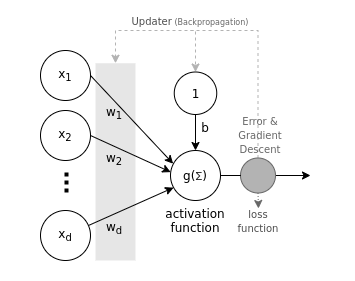

Iterative method for optimizing an objective function by performing updates after each example. It can be regarded as a stochastic approximation of [gradient descent](https://en.wikipedia.org/wiki/Gradient_descent).

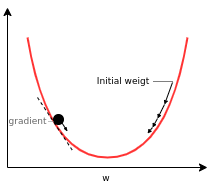

Gradient descent is an iterative algorithm, that starts from a random point on a function and travels down its slope in steps until it reaches the lowest point of that function.

#### gradient descent:

\begin{equation*}
  gradiant() = (ŷ-y)x
\end{equation*}


\begin{equation*}
  w_{t+1} = w_t - learning\_rate * gradiant()
\end{equation*}


In [7]:
fun gradient(x: INDArray, y: INDArray,g: ActivationFunction, 
             weights: INDArray, bias: INDArray): INDArray {
    val m = x.size(0) //number of examples
    val pred = h(x, weights, g, bias) // prediction of the current network 
    val diff = pred.dup().sub(y) //diff between predicted and expected
    return x.dup()
            .transpose()
            .mmul(diff)
            //.mul(1.0 / m) // regularization 
}    

#### Algorithm that performs updates after each example (training)

##### training function:
 - for nIterations 
 - compute gradient
 - apply learningRate
 - propagate gradient to weights

In [8]:
Nd4j.getRandom().setSeed(1234)

val learningRate = 0.9.toDouble()
val nIterations = 10000
val bias = Nd4j.zeros(1,1) // no bias
val g = Sigmoid()

fun training(g: ActivationFunction, x: INDArray, y: INDArray, maxIterations: Int): INDArray {
    
    var weights = Nd4j.rand(x.size(1).toInt(), 1) // init random weights

    for (i in 0 until maxIterations) {
        var gradients = gradient(x, y, g, weights, bias)
        gradients = gradients.mul(learningRate)
        weights = weights.sub(gradients)
    }
    return weights
}

##### Train the data and retrieve the optimized_weights

In [9]:
val optimized_weights = training(g, training_inputs, training_outputs, nIterations)

##### compute using the optimized weights applied to the neural network

In [10]:
fun compute_neural_network(x1: Number, x2: Number, x3: Number) {
    val inputs = Nd4j.create(arrayOf(floatArrayOf(x1.toFloat(), x2.toFloat(), x3.toFloat())))
    val output = h(inputs, optimized_weights, g, bias)
    println("input: "+ x1 +", "+ x2 +", "+ x3 +" | output = "+ output)
}

In [11]:
compute_neural_network(0,0,1)
compute_neural_network(1,1,1)
compute_neural_network(1,0,1)
compute_neural_network(0,1,1)
println("Prediction:")
compute_neural_network(1,1,1)

input: 0, 0, 1 | output = [[0.0002]]
input: 1, 1, 1 | output = [[0.9999]]
input: 1, 0, 1 | output = [[0.9999]]
input: 0, 1, 1 | output = [[0.0001]]
Prediction:
input: 1, 1, 1 | output = [[0.9999]]


## loss func

loss function is a method of evaluating how well specific algorithm models the given data.

In [12]:
fun loss(oldParams: INDArray, newParams: INDArray): Double {
        val diffSum: Double = Transforms.abs(oldParams.sub(newParams)).sumNumber().toDouble()
        return diffSum / oldParams.size(0)
}

In [13]:
fun training_with_loss(g: ActivationFunction, x: INDArray, y: INDArray, maxIterations: Int): INDArray {
    
    var weights = Nd4j.rand(x.size(1).toInt(), 1) // init random weights

    for (i in 1 until maxIterations+1) {
        var gradients = gradient(x, y, g, weights, bias)
        gradients = gradients.mul(learningRate)
        val newWeights = weights.sub(gradients)
        if (i%100==0) println("Iteration ${i} - loss: " + loss(weights, newWeights))
        weights = weights.sub(gradients)
    }
    return weights
}


In [14]:
val optimized_weights = training_with_loss(g, training_inputs, training_outputs, 1000)

Iteration 100 - loss: 0.010251730680465698
Iteration 200 - loss: 0.005086004734039307
Iteration 300 - loss: 0.0033775269985198975
Iteration 400 - loss: 0.002527127663294474
Iteration 500 - loss: 0.002018402020136515
Iteration 600 - loss: 0.0016801456610361736
Iteration 700 - loss: 0.0014390448729197185
Iteration 800 - loss: 0.0012582242488861084
Iteration 900 - loss: 0.0011179049809773762
Iteration 1000 - loss: 0.0010055998961130779


<hr>

## Deeplearning4J implementation

In [15]:
training_inputs

[[         0,         0,    1.0000], 
 [    1.0000,    1.0000,    1.0000], 
 [    1.0000,         0,    1.0000], 
 [         0,    1.0000,    1.0000]]

In [16]:
training_outputs

[[0], 
 [1.0000], 
 [1.0000], 
 [0]]

In [17]:
val ds = DataSet(training_inputs, training_outputs)

In [18]:
import org.nd4j.linalg.learning.config.Sgd
import org.nd4j.linalg.activations.Activation
import org.nd4j.linalg.learning.config.Nesterovs
import org.nd4j.linalg.lossfunctions.LossFunctions


val seed = 1234 // number used to initialize a pseudorandom number generator.
val nEpochs = 10000 // number of training epochs
val numHiddenNodes = 3


// https://medium.com/konvergen/momentum-method-and-nesterov-accelerated-gradient-487ba776c987
val conf = NeuralNetConfiguration.Builder()
        .weightInit(WeightInit.XAVIER)
        //.updater(Nesterovs(0.01, 0.9))
        .updater(Sgd(0.9))
        .seed(seed.toLong())
        .list()
        .layer(DenseLayer.Builder()
                .nIn(3)
                .nOut(numHiddenNodes)
                .activation(Activation.SIGMOID) // random initialize weights with values between 0 and 1
                .build())
        .layer(OutputLayer.Builder(LossFunctions.LossFunction.MSE) 
                .nIn(numHiddenNodes).nOut(1)
                .activation(Activation.IDENTITY)
                .build())
        .build()


In [19]:
import org.deeplearning4j.nn.api.OptimizationAlgorithm;

val net = MultiLayerNetwork(conf)
net.init()

// add an listener which outputs the error every 100 parameter updates
net.setListeners(ScoreIterationListener(100))

// C&P from LSTMCharModellingExample
// Print the number of parameters in the network (and for each layer)
println(net.summary())


LayerName (LayerType)   nIn,nOut   TotalParams   ParamsShape     
layer0 (DenseLayer)     3,3        12            W:{3,3}, b:{1,3}
layer1 (OutputLayer)    3,1        4             W:{3,1}, b:{1,1}
-----------------------------------------------------------------
            Total Parameters:  16
        Trainable Parameters:  16
           Frozen Parameters:  0



In [20]:
// here the actual learning takes place
for (i in 0 until nEpochs) {
    net.fit(ds)
}

In [21]:
fun compute_dl4j_neural_network(x1: Number, x2: Number, x3: Number) {
    val inputs = Nd4j.create(arrayOf(floatArrayOf(x1.toFloat(), x2.toFloat(), x3.toFloat())))
    val output = net.output(inputs)
    println("input: "+ x1 +", "+ x2 +", "+ x3 +" | dl4j output = "+ output)
}

In [22]:
compute_neural_network(0,0,1)
compute_neural_network(1,1,1)
compute_neural_network(1,0,1)
compute_neural_network(0,1,1)
println("Prediction:")
compute_neural_network(1,1,1)

input: 0, 0, 1 | output = [[0.0002]]
input: 1, 1, 1 | output = [[0.9999]]
input: 1, 0, 1 | output = [[0.9999]]
input: 0, 1, 1 | output = [[0.0001]]
Prediction:
input: 1, 1, 1 | output = [[0.9999]]
